In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import plotly.express as px

In [2]:
indicators = pd.read_csv('Indicators.csv')
indicators.sample(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2268522,Cameroon,CMR,Permanent cropland (% of land area),AG.LND.CROP.ZS,1993,2.538554e+00
5278132,Greece,GRC,Theoretical duration of secondary education (y...,SE.SEC.DURS,2012,6.000000e+00
150272,Greece,GRC,Gross domestic income (constant 2005 US$),NY.GDY.TOTL.KD,1965,4.198500e+10
3801952,Sub-Saharan Africa (developing only),SSA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,2004,3.590000e+02
2108692,United States,USA,Agricultural land (sq. km),AG.LND.AGRI.K2,1991,4.269480e+06


Selecting all the Indicator's starting with a indicator code "IC", since all the code starting with IC has observations which gives information related to new business kickoff

In [3]:
buss = indicators[indicators['IndicatorCode'].str.match(r'(^IC.*)')]
buss.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3476292,Arab World,ARB,Firms that do not report all sales for tax pur...,IC.FRM.INFM.ZS,2002,70.370000
3477197,Central Europe and the Baltics,CEB,Firms that do not report all sales for tax pur...,IC.FRM.INFM.ZS,2002,46.654545
3477198,Central Europe and the Baltics,CEB,Firms using banks to finance working capital (...,IC.FRM.BKWC.ZS,2002,25.300000
3478922,Euro area,EMU,Firms that do not report all sales for tax pur...,IC.FRM.INFM.ZS,2002,50.768000
3478923,Euro area,EMU,Firms using banks to finance working capital (...,IC.FRM.BKWC.ZS,2002,22.420000


In [4]:
buss.IndicatorCode.nunique()

51

Check for Null Values

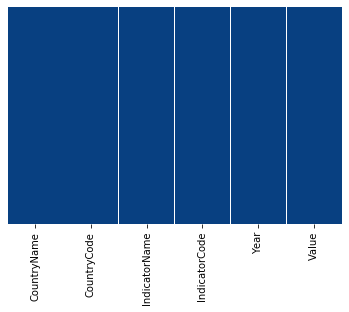

In [5]:
sns.heatmap(buss.isnull(),yticklabels=False,cbar=False,cmap='GnBu_r')

In [6]:
#To view the full content in the column
pd.set_option('display.max_colwidth',None)

Checking for Ease of doing business in a country 

In [7]:
xq = buss.query('IndicatorCode=="IC.BUS.EASE.XQ"')
top_10 = xq.groupby('CountryName',as_index=False)[['Value']].mean().sort_values(by='Value',ascending=True).iloc[:10]

Text(0.5, 1.0, 'Top 10 countries under Ease of doing business index')

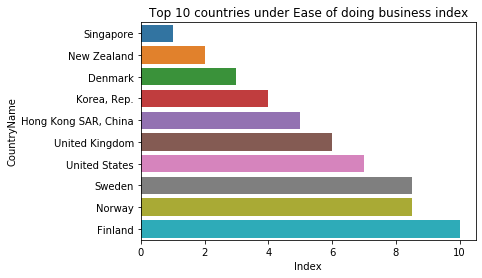

In [8]:
sns.barplot(top_10['Value'],top_10['CountryName'])
plt.xlabel('Index')
plt.title('Top 10 countries under Ease of doing business index')

In [9]:
# xq.Year.unique()

Below is the Folium world map depecting the color code based on the index for ease of doing business where 1 being the most friendly

In [10]:
tomap = xq.groupby(['CountryCode','CountryName'],as_index=False)['Value'].mean()
tomap

,CountryCode,CountryName,Value
0,AFG,Afghanistan,176.000000
1,AGO,Angola,182.000000
2,ALB,Albania,79.500000
3,ARB,Arab World,122.261905
4,ARE,United Arab Emirates,31.500000
...,...,...,...
216,YEM,"Yemen, Rep.",167.500000
217,ZAF,South Africa,71.000000
218,ZAR,"Congo, Dem. Rep.",185.500000
219,ZMB,Zambia,94.000000


In [11]:
country_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

world_map = folium.Map(location=[100, 0], zoom_start=2)

folium.Choropleth(
    geo_data=country_geo,
    data=tomap,
    columns=['CountryCode','Value'],
    key_on='feature.id',
    fill_color='YlGnBu', 
    fill_opacity=0.6, 
    line_opacity=1,
    legend_name="Ease of doing Business"
).add_to(world_map)
world_map

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /python-visualization/folium/master/examples/data/world-countries.json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CBD9307188>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

Comparing all the parameters for 2 nations which are in top 10 list of ease of doing business, considered the GBR ie Great Britian and Singapore(SGP) which are at the 6th and 1st position respectively

In [12]:
gbr = buss.loc[(buss['CountryCode']=="GBR")] 
gbr.IndicatorCode.nunique()

31

In [13]:
sgp = buss.loc[(buss['CountryCode']=="SGP")] 
sgp.IndicatorCode.nunique()

31

In [14]:
a = gbr.groupby('IndicatorName')[['Value']].mean()

In [15]:
b = sgp.groupby('IndicatorName')[['Value']].mean()

In [16]:
a.merge(b,left_index=True,right_index=True,suffixes=('_United Kingdom', '_Singapore'))

,Value_United Kingdom,Value_Singapore
IndicatorName,,
Business extent of disclosure index (0=less disclosure to 10=more disclosure),10.000000,10.000000
Cost of business start-up procedures (% of GNI per capita),0.646154,0.761538
Cost to export (US$ per container),1014.000000,444.800000
Cost to import (US$ per container),1154.600000,417.600000
Depth of credit information index (0=low to 8=high),8.000000,7.000000
Distance to frontier score (0=lowest performance to 100=frontier),83.662857,91.007143
Documents to export (number),4.000000,3.000000
Documents to import (number),4.000000,3.000000
Ease of doing business index (1=most business-friendly regulations),6.000000,1.000000


In [17]:
reg_proc_gb = gbr.query('IndicatorCode=="IC.REG.PROC"')

In [18]:
reg_proc_sg = sgp.query('IndicatorCode=="IC.REG.PROC"')

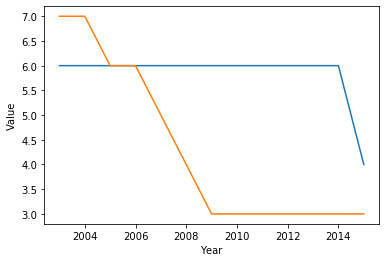

In [19]:
sns.lineplot(reg_proc_gb['Year'],reg_proc_gb['Value'])
sns.lineplot(reg_proc_sg['Year'],reg_proc_sg['Value'])

Below is a dashboard where a user can compare any two countries for ease of doing business based on the parameters/Indicators

In [20]:
import dash
import plotly
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

ModuleNotFoundError: No module named 'dash'

In [21]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dash (from versions: none)
ERROR: No matching distribution found for dash


In [22]:
ext_styles = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=ext_styles)

NameError: name 'dash' is not defined

In [ ]:
available_indicators = buss['IndicatorName'].unique()
available_country = buss['CountryName'].unique()

In [ ]:
app.layout = html.Div([ 
    html.H1('Ease Of Doing Business',style={'textAlign':'center','font-size': '35px','color':'#343434'}),
    html.Div([
        dcc.Graph(id='wld_map',
                  figure = px.choropleth(tomap,locations='CountryCode',color='Value',projection='natural earth',
                                         title='Rating Index for ease of doing business',hover_name=tomap['CountryName']
                                         ,color_continuous_scale=px.colors.sequential.Blues,range_color=(1,190)
                                        ) 
                       )],className='twelve columns'),
    html.Div([
    html.Div('Select any two countries',style={'color':'#343434','margin-bottom':'10px','font-weight':'bold','font-size':'18px'}), 
    dcc.Dropdown(id='cout1',options=[{'label':i,'value':i} for i in available_country],value='Singapore',style={'width':'50%','margin-bottom':'10px'}),
    dcc.Dropdown(id='cout2',options=[{'label':i,'value':i}for i in available_country],value='United Kingdom',style={'width':'50%'}),
    html.Div('Select a parameter to compare',style={'color':'#343434','margin-top':'10px','font-weight':'bold','font-size':'18px'}),
    dcc.Dropdown(id='indi',options=[{'label': i,'value':i} for i in available_indicators],
                value='Start-up procedures to register a business (number)',style={'width':'70%'})],className='nine columns') ,
    html.Div([
        html.Div([dcc.Graph('one_grap')],className='six columns'),
        html.Div([dcc.Graph(
            id='top_grap',
             figure={
                 'data':[{'x':top_10['CountryName'],'y':top_10['Value'],'type':'bar'}],
                 'layout': 
                     dict(title=('Top 10 countries under Ease of doing business index'),
                     xaxis={'title':'Countries'},
                     yaxis={'title':'Ratings'}
                            )
                     }
             )],className='six columns'),
             ],className='row')
])
@app.callback(Output(component_id='one_grap',component_property='figure'),
              [Input(component_id='cout1',component_property='value'),
              Input('cout2',component_property='value'),
              Input('indi','value')]
              )
def to_pltng(cou1,cou2,ind1):
    fir = buss[buss.CountryName == cou1]
    sec = buss[buss.CountryName == cou2]
    fir_ind = fir[fir.IndicatorName == ind1]
    sec_ind = sec[sec.IndicatorName == ind1]
    fir_dic = {'x':fir_ind.Year,'y':fir_ind.Value,'name':cou1}
    sec_dic = {'x':sec_ind.Year,'y':sec_ind.Value,'name':cou2}
    return {
        'data':[fir_dic,sec_dic],
        'layout': dict(title='Comparing two countries as per Indicator selection',
            xaxis={'title':'Years'},
            yaxis={'title':'Value as per Indicator selection'}
        )
    }

if __name__=='__main__':
    app.run_server(debug=False)